<div class="alert alert-block alert-info" markdown=1>
<b><i><font size = 5> Содержание </font></i></b><a id = "content"></a>

<br><b>1. [Загрузка библиотек](#libraries)</b>

<br><b>2. [Загрузка датасета](#dataset)</b>

<br><b>3. [Загрузка датасета в поддерживаемом SQL формате в базу данных](#SQLsupportable)</b>
    
<br><b>4. [Анализ датасета с помощью SQL запросов](#analysis)</b>   

   
   

<div>

In [ ]:
# Установка библиотеки pymysql раскомментируйте сторку ниже
#!pip install pymysql

In [ ]:
# Установка библиотеки sqlite3 раскомментируйте сторку ниже
#!pip install sqlite3

<div class="alert alert-block alert-success">
<b><i><font size = 4>Загрузка библиотек</font></i></b><a id="libraries"></a>
</div>

In [2]:
import pandas as pd
import pymysql
import sqlite3

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors

In [4]:
import seaborn as sns

<div class="alert alert-block alert-success">
<b><i><font size = 4>Загрузка датасета</font></i></b><a id = "dataset"></a>
</div>

<font color = darkblue><b> Описание датасета, анализ котого будет производиться ниже </b></font>
<br> Датасет содержит информацию о рейсах американский авиалиний (международные и внутренние рейсы), вылетающих из международного аэропорта Сан-Франциско, Калифорния, США. 
<br>Датасет содержит следующие колоноки: 

<br>0 activity_period - Даты осуществления полетов, начиная с июля 2005 по декабрь 2020. Детализация до месяца. 
<br>1 operating_airline - Названия авиалиний
<br>2 operating_airline_iata - коды IATA https://www.iata.org/en/about/
<br>3 published_airline - Названия авиалиний
<br>4 published_airline_iata - коды IATA https://www.iata.org/en/about/
<br>5 geo_summary - содержит разделение на домашние и международные рейсы.
<br>6 geo_region - содержит информацию о регионе назначения в маршруте или о регионе отправления. 
<br>7 activity_type - отражает о том, был ли груз отправлен из указанного региона 'geo_region' или привезен в указанный регион 'geo_region'. 
<br>8 cargo_type - содержит информацию о типе груза: Express (экспресс-перевозка), Cargo (грузовые поставки), Mail (почтовые отправления), т.д.
<br>9 cargo_aircraft_type - содержит информацию о типе борта - грузовой или пассажирский
<br>10 cargo_weight_lbs - вес груза в фунтах (lbs = pounds)
<br>11 cargo_metric_tons - вес груза в тоннах. Веса ранжируются от 0,0004 тонн (возможно, почта) до 10801 тонн (большие поставки).


<br>В Датасете 12 колонок, 34037 строк

In [5]:
# Прочитаем файлы
air = pd.read_csv('~/Air_Traffic_Cargo_Statistics.csv')

In [6]:
air.sample(5)

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons
33701,202011,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Mail,Passenger,6206,2.815042
27479,201801,SAS Airlines,SK,SAS Airlines,SK,International,Europe,Deplaned,Express,Passenger,9500,4.309200
21009,201502,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Enplaned,Mail,Passenger,29668,13.457405
19989,201408,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,61164,27.743990
25616,201704,Air France,AF,Air France,AF,International,Europe,Deplaned,Cargo,Passenger,577842,262.109131


In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34037 entries, 0 to 34036
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   activity_period         34037 non-null  int64  
 1   operating_airline       34037 non-null  object 
 2   operating_airline_iata  33992 non-null  object 
 3   published_airline       34037 non-null  object 
 4   published_airline_iata  33992 non-null  object 
 5   geo_summary             34037 non-null  object 
 6   geo_region              34037 non-null  object 
 7   activity_type           34037 non-null  object 
 8   cargo_type              34037 non-null  object 
 9   cargo_aircraft_type     34037 non-null  object 
 10  cargo_weight_lbs        34037 non-null  int64  
 11  cargo_metric_tons       34037 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.1+ MB


> **Переведем данные в колонке 'activity_period' в формат Времени**

In [8]:
dt = air.copy(deep=True)

In [9]:
dt['activity_period'] = pd.to_datetime(dt['activity_period'], format = '%Y%m')

In [10]:
dt.dropna(subset = ['operating_airline'], inplace= True)

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34037 entries, 0 to 34036
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   activity_period         34037 non-null  datetime64[ns]
 1   operating_airline       34037 non-null  object        
 2   operating_airline_iata  33992 non-null  object        
 3   published_airline       34037 non-null  object        
 4   published_airline_iata  33992 non-null  object        
 5   geo_summary             34037 non-null  object        
 6   geo_region              34037 non-null  object        
 7   activity_type           34037 non-null  object        
 8   cargo_type              34037 non-null  object        
 9   cargo_aircraft_type     34037 non-null  object        
 10  cargo_weight_lbs        34037 non-null  int64         
 11  cargo_metric_tons       34037 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), ob

<div class="alert alert-block alert-success">
<b><i><font size = 4>Загрузка датасета в поддерживаемом SQL формате в базу данных</font></i></b><a id="SQLsupportable"></a>
</div>

In [23]:
conn = sqlite3.connect('mydb_sql.db')

In [24]:
#функция для выполнения (чтения) sql-запросов
def fetch_query(sql):
    try: 
        conn = sqlite3.connect('mydb_sql.db')
        return pd.read_sql_query(sql, conn)
    except Exception as t:
        print (t)
    finally:
        conn.close()

In [25]:
dt.to_sql('dt_sql', conn, if_exists='replace', index=False)

<div class="alert alert-block alert-success">
<b><i><font size = 4>Анализ датасета с помощью SQL запросов</font></i></b><a id="analysis"></a>
</div>

In [16]:
dt.sample(5)

,activity_period,operating_airline,operating_airline_iata,published_airline,published_airline_iata,geo_summary,geo_region,activity_type,cargo_type,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons
19777,2014-07-01,EVA Airways,BR,EVA Airways,BR,International,Asia,Enplaned,Express,Passenger,475,0.215460
16292,2012-10-01,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Mail,Passenger,50318,22.824245
32478,2020-02-01,United Airlines,UA,United Airlines,UA,International,Asia,Deplaned,Express,Passenger,532,0.241315
21958,2015-07-01,United Airlines,UA,United Airlines,UA,International,Asia,Enplaned,Mail,Passenger,544755,247.100868
23779,2016-06-01,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Deplaned,Cargo,Passenger,126331,57.303742


**Рассматриваемый период**

In [26]:
sql = """
Select 
min(date(activity_period)) as начало_периода, max(date(activity_period)) as конец_периода
FROM dt_sql

"""
fetch_query(sql)

,начало_периода,конец_периода
0,2005-07-01,2020-12-01


**Количество рейсов по годам**

In [27]:
sql = """
Select 
count (activity_period) as Количество_рейсов,
strftime ('%Y',  activity_period) as Год
FROM dt_sql
group by strftime ('%Y',  activity_period)
order by count (activity_period) desc
"""
fetch_query(sql)

,Количество_рейсов,Год
0,2430,2019
1,2321,2018
2,2290,2007
3,2289,2017
4,2289,2008
5,2270,2006
6,2262,2010
7,2254,2009
8,2196,2016
9,2141,2015


**Вариант с созданием таблицы**

In [28]:
sql = """
CREATE TABLE IF NOT EXISTS newtable AS 
SELECT 
COUNT (activity_period) AS Количество_рейсов,
strftime ('%Y',  activity_period) AS Год
FROM dt_sql
GROUP BY strftime ('%Y',  activity_period)
ORDER BY count (activity_period) desc
"""
fetch_query(sql)

'NoneType' object is not iterable


In [29]:
sql = """
Select 
*
FROM newtable
"""
fetch_query(sql)

,Количество_рейсов,Год
0,2430,2019
1,2321,2018
2,2290,2007
3,2289,2017
4,2289,2008
5,2270,2006
6,2262,2010
7,2254,2009
8,2196,2016
9,2141,2015


In [31]:
sql = """
Select 
*
FROM newtable
order by Год desc
"""
fetch_query(sql)

,Количество_рейсов,Год
0,1930,2020
1,2430,2019
2,2321,2018
3,2289,2017
4,2196,2016
5,2141,2015
6,1981,2014
7,2016,2013
8,2077,2012
9,2133,2011


In [32]:
a = pd.read_sql_query(
"""
Select 
count (activity_period) as Количество_рейсов,
strftime ('%Y',  activity_period) as Год
FROM dt_sql
group by strftime ('%Y',  activity_period)
order by Год asc
""", 
con = conn)

In [33]:
a['Год'].unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

Text(0.5, 1.0, 'Количество рейсов по годам')

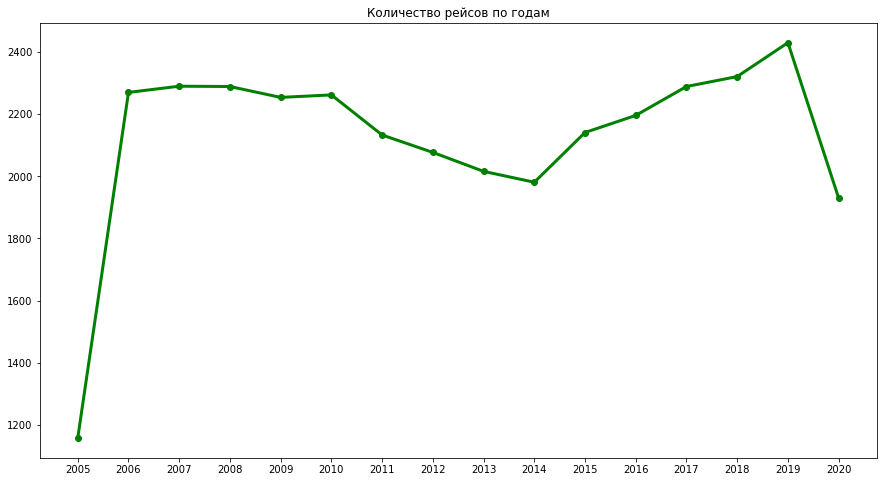

In [34]:
plt.figure(figsize=(15,8))
plt.plot('Год', 'Количество_рейсов', data=a, marker='o',color='green',linewidth=3)
plt.title("Количество рейсов по годам")

**Выводы:**
<br> На приведенном графие видны 2 серьезных "проседания" по количеству рейсов. Оба периода спада совпадают с кризисами: мировой кризис 2014 года и кризис, связанный с пандемией Ковид в 2020 г.


In [35]:
a = pd.read_sql_query(
"""
Select 
count (activity_period) as Количество_рейсов,
strftime ('%Y%m', activity_period) as Год_Мес
FROM dt_sql
group by strftime ('%Y%m',  activity_period)
order by Год_Мес asc
""", 
con = conn)

Text(0.5, 1.0, 'Количество рейсов по месяцам')

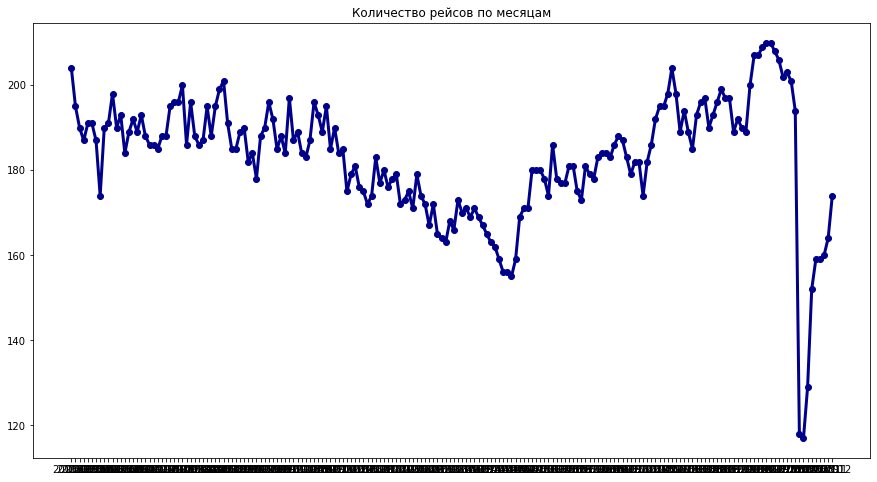

In [36]:
plt.figure(figsize=(15,8))
plt.plot('Год_Мес', 'Количество_рейсов', data=a, marker = 'o', color = 'darkblue', linewidth = 3)
plt.title("Количество рейсов по месяцам")

In [37]:
a = pd.read_sql_query(
"""
with Selected as(
Select * 
from dt_sql
where strftime('%Y', activity_period) in ('2017','2018','2019','2020'))
Select 
count (activity_period) as Flights_Qty,
strftime ('%m', activity_period) as Mnth,
strftime ('%Y', activity_period) as Year
from Selected
group by Year, Mnth
order by Year, Mnth asc
""", 
con=conn)

In [38]:
a.head()

,Flights_Qty,Mnth,Year
0,182,01,2017
1,174,02,2017
2,182,03,2017
3,186,04,2017
4,192,05,2017


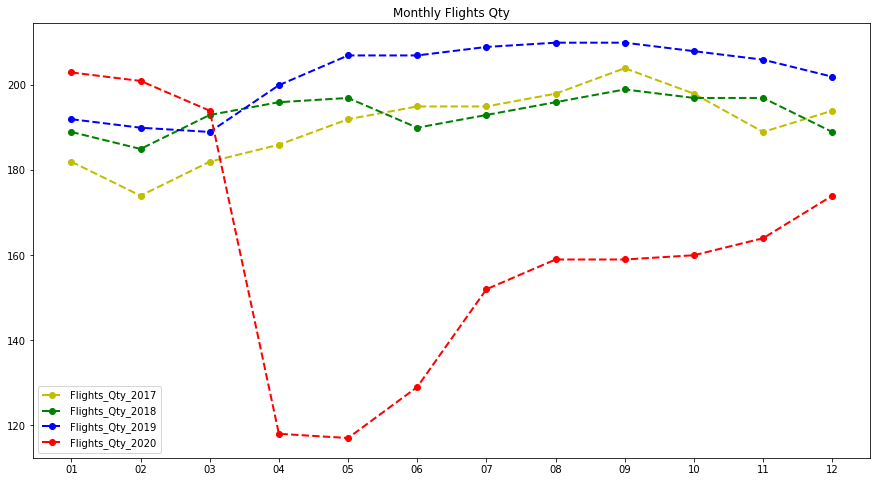

In [39]:
plt.figure(figsize = (15,8))
plt.plot('Mnth','Flights_Qty', data = a[a['Year']=='2017'], marker ='o', color = 'y', linewidth = 2, ls='--', 
         label="Flights_Qty_2017")
plt.plot('Mnth','Flights_Qty', data = a[a['Year']=='2018'], marker ='o', color = 'g', linewidth = 2, ls='--', 
         label="Flights_Qty_2018")
plt.plot('Mnth', 'Flights_Qty', data = a[a['Year']=='2019'], marker ='o', color = 'b', linewidth = 2, ls='--',
        label="Flights_Qty_2019")
plt.plot('Mnth', 'Flights_Qty', data = a[a['Year']=='2020'], marker ='o', color = 'r', linewidth = 2, ls='--',
        label="Flights_Qty_2020")
plt.title("Monthly Flights Qty")
plt.legend(loc ='best')

In [40]:
a = pd.read_sql_query(
"""
select 
strftime('%Y', activity_period) as Year,
strftime('%m', activity_period) as Mnth,
count (activity_period) as Flights_Qty, 
geo_summary
from dt_sql
where geo_summary = 'Domestic'
group by Year, Mnth 
Order by Year, Mnth asc

""", 
con=conn)

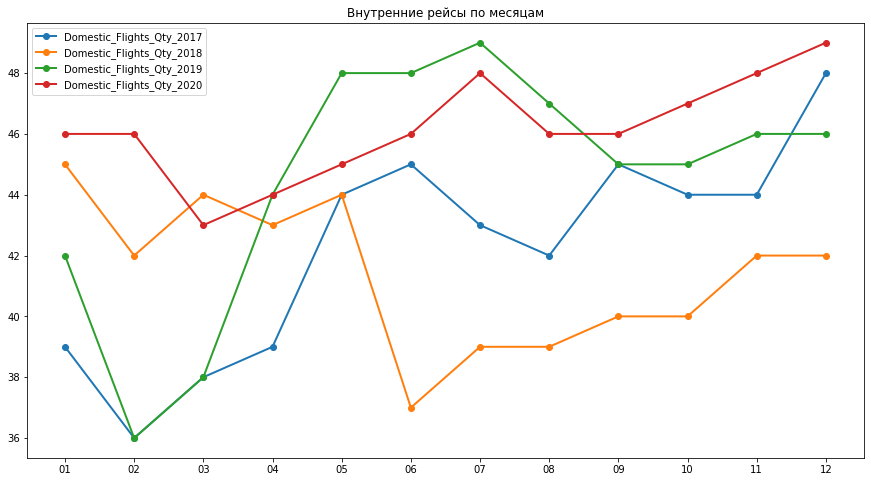

In [41]:
plt.figure(figsize = (15,8))
plt.title("Внутренние рейсы по месяцам")
for i in ('2017','2018', '2019', '2020'):
    plt.plot('Mnth', 'Flights_Qty', data = a[a['Year']==i], linestyle='-', marker = 'o', linewidth = 2, label = f'Domestic_Flights_Qty_{i}')
    plt.legend(loc = 'best')
plt.show()

**Выводы:** <br> сравнение графиков по 2017, 2018, 2019 годам не показало наличие постоянной сезонности (повторяющейся из года в год). Скорее всего, количество полетов зависело от проводимых в эти годы акций на стоимость полетов внутри страны. 2020 год также не показывает сезонности, но показывает тенденцию на увеличение внутренних перелётов (перевозок), связанную, предроложительно, с ограничениеями, введенными странами из-за Ковид

In [42]:
a = pd.read_sql_query(
"""
select 
strftime('%Y', activity_period) as Year,
strftime('%m', activity_period) as Mnth,
count (activity_period) as Flights_Qty, 
geo_summary
from dt_sql
where geo_summary = 'International'
group by Year, Mnth 
Order by Year, Mnth asc

""", 
con=conn)

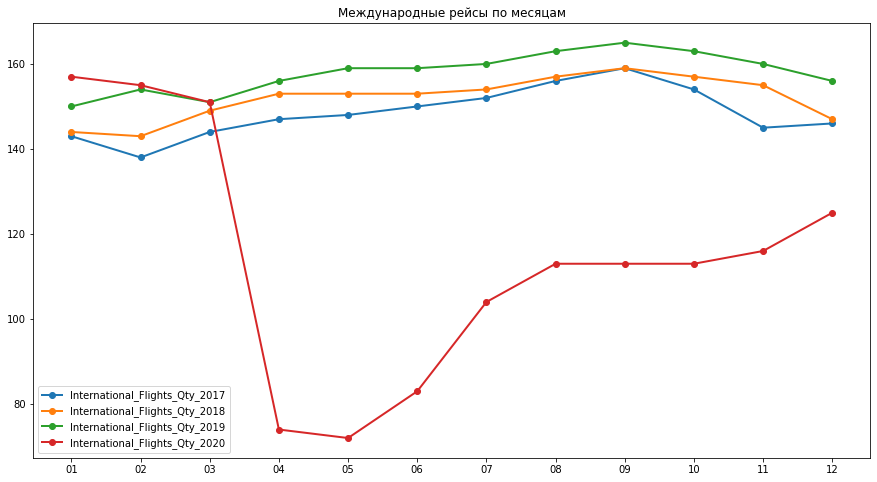

In [43]:
plt.figure(figsize = (15,8))
plt.title("Международные рейсы по месяцам")
for i in ('2017','2018', '2019', '2020'):
    plt.plot('Mnth', 'Flights_Qty', data = a[a['Year']==i], linestyle='-', marker = 'o', linewidth = 2, label = f'International_Flights_Qty_{i}')
    plt.legend(loc = 'best')
plt.show()

**Выводы:** <br> сравнение графиков по 2017, 2018, 2019 годам показало наличие небольшой постоянной сезонности (повторяющейся из года в год): увеличение кол-ва рейсов наблюдается во втором квартале года и в период с сентября по ноябрь. График 2020 года отражает картину связанную с ограничениями на международные перелёты в связи с Ковид. С мая - июня 2020 г. кол-во рейсов постепенно увеличивается, выходя на более-менее постоянные значения с августа. Однако кол-во международных рейсов в 2020 году значительно ниже доковидного уровня. 

_**Количество авиакомпаний**_

In [44]:
pd.read_sql_query (
"""
select count (distinct operating_airline) as `Всего авиакомпаний`
from dt_sql
""", 
con = conn)

,Всего авиакомпаний
0,96


In [45]:
%%time
pd.read_sql_query(
"""
WITH Domestic_flights AS 
(
SELECT 
    operating_airline
FROM 
    dt_sql
WHERE 
    geo_summary = 'Domestic'
),
Inter_flights as 
(
Select
    operating_airline
from 
    dt_sql
where 
    geo_summary = "International"
)
Select
    count (distinct Domestic_flights.operating_airline) as `Всего авиалиний на домашних рейсах`, 
    count (distinct Inter_flights.operating_airline) as `Всего авиалиний на международных рейсах`
from 
    Domestic_flights, Inter_flights
""", 
con = conn)

Wall time: 2min 53s


,Всего авиалиний на домашних рейсах,Всего авиалиний на международных рейсах
0,42,66


_**Наименования авиакомпаний, осуществляющих внутренние и международные рейсы**_

In [46]:
a = pd.read_sql_query(
"""
SELECT 
DISTINCT operating_airline
FROM dt_sql
WHERE geo_summary = 'International'
""",
    
con = conn)


In [47]:
a

,operating_airline
0,Air Canada
1,Air China
2,Air France
3,Air New Zealand
4,Alaska Airlines
...,...
61,El Al Israel Airlines LTD.
62,TAP Air Portugal
63,Norwegian Air Shuttle ASA
64,Sun Country Airlines


In [48]:
n=[]
for i in a.values.tolist(): 
    n.append(i)
print (n)

[['Air Canada'], ['Air China'], ['Air France'], ['Air New Zealand'], ['Alaska Airlines'], ['All Nippon Airways'], ['Asiana Airlines'], ['British Airways'], ['Cargolux Airlines'], ['Cathay Pacific'], ['China Airlines'], ['China Cargo Airlines'], ['EVA Airways'], ['Icelandair (Inactive)'], ['Japan Airlines'], ['KLM Royal Dutch Airlines'], ['Korean Air Lines'], ['Lufthansa German Airlines'], ['Nippon Cargo Airlines'], ['Northwest Airlines (became Delta)'], ['Philippine Airlines'], ['Singapore Airlines'], ['TACA International Airlines, S.A.'], ['United Airlines - Pre 07/01/2013'], ['Virgin Atlantic'], ['Qantas Airways'], ['Air Canada Jazz'], ['Evergreen International Airlines'], ['Focus Air'], ['Aer Lingus'], ['Jet Airways'], ['Emirates'], ['Aeromexico'], ['Delta Air Lines'], ['Air Berlin'], ['Swissport USA'], ['Southern Air'], ['Swiss International'], ['LAN Peru'], ['China Eastern'], ['SAS Airlines'], ['United Airlines'], ['Atlas Air, Inc'], ['Etihad Airways'], ['China Southern'], ['Feder

In [49]:
pd.read_sql_query(
"""
SELECT 
DISTINCT operating_airline
FROM dt_sql
WHERE geo_summary = 'Domestic'
""",
    
con = conn)

,operating_airline
0,ABX Air
1,ATA Airlines
2,Alaska Airlines
3,American Airlines
4,Ameriflight
5,Astar Air Cargo
6,Atlantic Southeast Airlines
7,Delta Air Lines
8,Evergreen International Airlines
9,Federal Express


**Список компаний, которые осуществляют как внутренние, так и международные рейсы**

In [50]:
%%time
#self join
sql = """
SELECT D.geo_summary as DAL, I.geo_summary as IAL, D.operating_airline
FROM dt_sql as D, dt_sql as I
WHERE DAL <> IAL AND D.operating_airline = I.operating_airline
group by D.operating_airline
ORDER BY D.operating_airline
"""
fetch_query(sql)

Wall time: 23.5 s


,DAL,IAL,operating_airline
0,Domestic,International,Alaska Airlines
1,Domestic,International,"Atlas Air, Inc"
2,Domestic,International,Delta Air Lines
3,Domestic,International,Evergreen International Airlines
4,Domestic,International,Federal Express
5,Domestic,International,Kalitta Air
6,Domestic,International,Northwest Airlines (became Delta)
7,Domestic,International,Southern Air
8,Domestic,International,Sun Country Airlines
9,Domestic,International,"Total Airport Services, Inc. (Inactive)"


>> **Или то же самое через использование Table**

In [51]:
%%time
sql = """
CREATE TABLE IF NOT EXISTS Dom_table AS
SELECT geo_summary, operating_airline
from dt_sql
where geo_summary = 'Domestic'
"""
fetch_query(sql)

'NoneType' object is not iterable
Wall time: 42 ms


In [52]:
sql = """
CREATE TABLE IF NOT EXISTS Inter_table AS
SELECT geo_summary, operating_airline
from dt_sql
where geo_summary = 'International';
"""
fetch_query(sql)

'NoneType' object is not iterable


In [53]:
%%time
#aliases
sql = """
select Dom_table.operating_airline DAL, Inter_table.operating_airline IAL
from Dom_table, Inter_table 
where DAL = IAL
group by DAL
"""
fetch_query(sql)

Wall time: 7.45 s


,DAL,IAL
0,Alaska Airlines,Alaska Airlines
1,"Atlas Air, Inc","Atlas Air, Inc"
2,Delta Air Lines,Delta Air Lines
3,Evergreen International Airlines,Evergreen International Airlines
4,Federal Express,Federal Express
5,Kalitta Air,Kalitta Air
6,Northwest Airlines (became Delta),Northwest Airlines (became Delta)
7,Southern Air,Southern Air
8,Sun Country Airlines,Sun Country Airlines
9,"Total Airport Services, Inc. (Inactive)","Total Airport Services, Inc. (Inactive)"


**Количество уникальных авиакомпаний по годам**

In [54]:
sql="""
Select 
count (distinct operating_airline) as `Количество авиакомпаний`,
strftime('%Y', activity_period) as Год
from dt_sql
group by Год
"""
fetch_query(sql)

,Количество авиакомпаний,Год
0,46,2005
1,47,2006
2,48,2007
3,47,2008
4,45,2009
5,49,2010
6,47,2011
7,45,2012
8,46,2013
9,47,2014


**Самые популярные авикомпании (Топ 10)**

In [55]:
sql = """
select count (operating_airline) as Qty, operating_airline
from dt_sql
group by operating_airline
order by Qty desc
limit 10
"""
fetch_query(sql)

,Qty,operating_airline
0,3218,United Airlines
1,2503,United Airlines - Pre 07/01/2013
2,1457,Korean Air Lines
3,1338,Alaska Airlines
4,1239,Asiana Airlines
5,1227,China Airlines
6,1219,EVA Airways
7,1030,Air Canada
8,952,Delta Air Lines
9,920,Singapore Airlines


**Самые популярные авикомпании на внутренних рейсах (Топ 10)**

In [56]:
%%time
sql = """
with Dom as
(
Select
operating_airline, geo_summary
from dt_sql
where geo_summary = 'Domestic') 
select
Dom.operating_airline,
count(Dom.operating_airline) as DQty 
from Dom
group by Dom.operating_airline
order by DQty desc
limit 10
"""
fetch_query(sql)

Wall time: 30 ms


,operating_airline,DQty
0,Alaska Airlines,911
1,United Airlines,898
2,Delta Air Lines,752
3,American Airlines,731
4,US Airways,548
5,United Airlines - Pre 07/01/2013,544
6,Sun Country Airlines,503
7,Horizon Air,410
8,Frontier Airlines,371
9,Hawaiian Airlines,370


**Самые популярные авикомпании на международных рейсах (Топ 10)**

In [57]:
%%time
sql = """
with Inter as
(
Select
operating_airline, geo_summary
from dt_sql
where geo_summary = 'International') 
select
operating_airline,
count(Inter.operating_airline) as IQty 
from Inter
group by Inter.operating_airline
order by IQty desc
limit 10
"""
fetch_query(sql)

Wall time: 47 ms


,operating_airline,IQty
0,United Airlines,2320
1,United Airlines - Pre 07/01/2013,1959
2,Korean Air Lines,1457
3,Asiana Airlines,1239
4,China Airlines,1227
5,EVA Airways,1219
6,Air Canada,1030
7,Singapore Airlines,920
8,Cathay Pacific,885
9,Japan Airlines,875


**Перевозка грузовых отправок на разных типах бортов**

In [58]:
sql = """
SELECT
cargo_type, cargo_aircraft_type, sum(cargo_metric_tons) as Total_weight, count(cargo_metric_tons) as Shipments
FROM dt_sql
WHERE cargo_type = 'Cargo'
group by cargo_aircraft_type
"""
fetch_query(sql)

,cargo_type,cargo_aircraft_type,Total_weight,Shipments
0,Cargo,Combi,1.142955e+05,253
1,Cargo,Freighter,2.522713e+06,3844
2,Cargo,Passenger,3.284018e+06,14568


**Суммарный вес грузовых отправок на разных типах бортов**

In [59]:
a = pd.read_sql_query(
"""
SELECT
cargo_type, cargo_aircraft_type, sum(cargo_metric_tons) as weight, 
strftime('%Y', activity_period) as Years
FROM dt_sql
WHERE cargo_type = 'Cargo'
group by Years, cargo_aircraft_type
""", 
con = conn)

In [60]:
a['weight'].sum()

5921027.1175658

In [61]:
dt[dt['cargo_type']=='Cargo']['cargo_metric_tons'].sum()

5921027.1175658

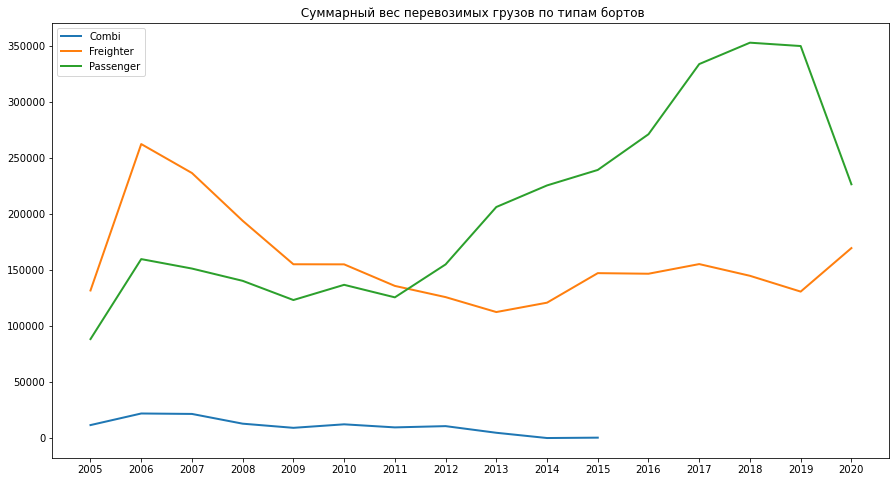

In [63]:
plt.figure(figsize = (15,8))
plt.title(' Суммарный вес перевозимых грузов по типам бортов')
plt.plot('Years', 'weight', data = a[a['cargo_aircraft_type']=='Combi'], linewidth = 2, label = 'Combi')
plt.plot('Years', 'weight', data = a[a['cargo_aircraft_type']=='Freighter'], linewidth = 2, label = 'Freighter')
plt.plot('Years', 'weight', data = a[a['cargo_aircraft_type']=='Passenger'], linewidth = 2, label = 'Passenger')
plt.legend(loc = 'best')
plt.show()

_**Выводы:**_<br> **`Combi`** перестал использоваться для перевозки грузовых поставок с 2015 года.
<br> **`Freighter & Passenger`** До 2011 года суммарный годовой вес груза на грузовых бортах был больше, чем на пассажирских. с 2011 года картина стала прямо противоположной. Из этих данных предварительно можно сделать следующие выводы: стало больше малогабаритного не очень тыжелого груза (до 200 кг), который подходит для перевозки пассажирскими рейсами. 
<br>Но стоит также рассмотреть кол-во поставок и средний вес поставок в разрезе типов бортов. 

**Суммарное годовое количество грузовых отправок на разных типах бортов**

In [64]:
a = pd.read_sql_query(
"""
SELECT
cargo_type, cargo_aircraft_type, count(cargo_metric_tons) as Qty, 
strftime('%Y', activity_period) as Years
FROM dt_sql
WHERE cargo_type = 'Cargo'
group by Years, cargo_aircraft_type
""", 
con = conn)

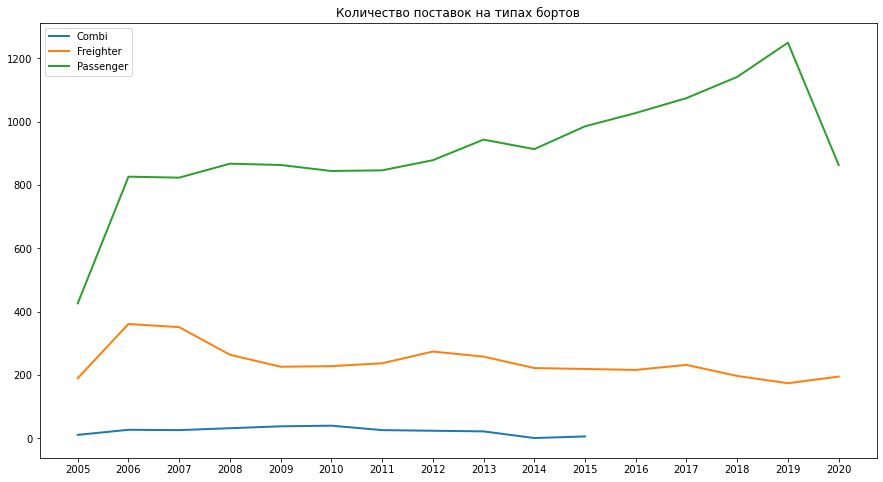

In [65]:
plt.figure(figsize = (15,8))
plt.title('Количество поставок на типах бортов')
plt.plot('Years', 'Qty', data = a[a['cargo_aircraft_type']=='Combi'], linewidth = 2, label = 'Combi')
plt.plot('Years', 'Qty', data = a[a['cargo_aircraft_type']=='Freighter'], linewidth = 2, label = 'Freighter')
plt.plot('Years', 'Qty', data = a[a['cargo_aircraft_type']=='Passenger'], linewidth = 2, label = 'Passenger')
plt.legend(loc = 'best')
plt.show()

_**Выводы:**_<br> **`Combi`** перестал использоваться для перевозки грузовых поставок с 2015 года. Этот тип борта использовался для перевозки грузов значительно реже Пассажирского и Грузового.
<br> **`Passenger`** Суммарное количество поставок, перевозимых пассажирскими рейсами, значительно превышало количество поставок на грузовых рейсах с 2006 года. Особенно заметна разница в 2019 году, что может быть следствием начавшейся в конце 2019 года пандемии, в связи с которой для перевозки грузов активнее задействовали пассажирские рейсы.
<br> **`Freighter`**   По количеству поставок уступает пассажирским рейсам, но это может быть следствием того, что грузовые борты чаще используются для более тыжелых и крупногабаритных поставок. Т.е. в связи с этим на одном борту можно разместить меньшее количество поставок. 
<br>Но стоит также рассмотреть средний вес поставок в разрезе типов бортов. 

**Средний вес поставок по годам на разных типах бортов**

In [66]:
a = pd.read_sql_query(
"""
SELECT
cargo_type, cargo_aircraft_type, AVG(cargo_metric_tons) as AVR_weight,
strftime('%Y', activity_period) as Years
FROM dt_sql
WHERE cargo_type = 'Cargo'
group by Years, cargo_aircraft_type
""", 
con = conn)

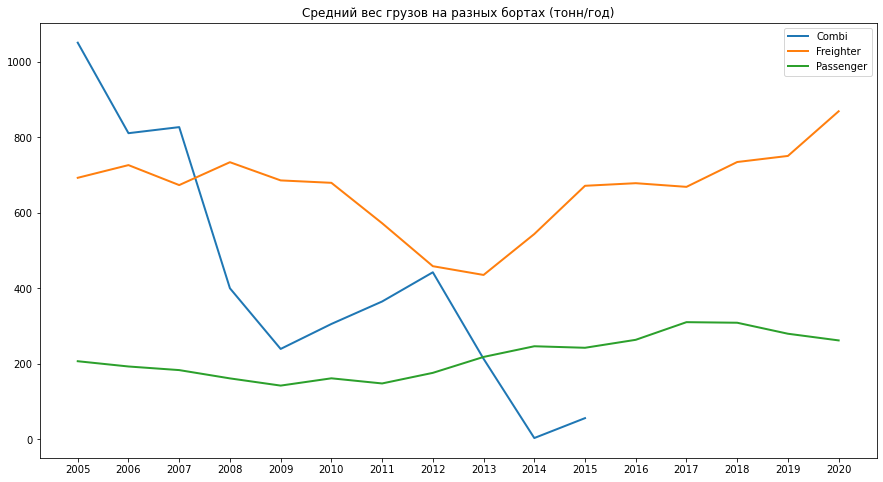

In [67]:
plt.figure(figsize = (15,8))
plt.title('Средний вес грузов на разных бортах (тонн/год)')
plt.plot('Years', 'AVR_weight', data = a[a['cargo_aircraft_type']=='Combi'], linewidth = 2, label = 'Combi')
plt.plot('Years', 'AVR_weight', data = a[a['cargo_aircraft_type']=='Freighter'], linewidth = 2, label = 'Freighter')
plt.plot('Years', 'AVR_weight', data = a[a['cargo_aircraft_type']=='Passenger'], linewidth = 2, label = 'Passenger')
plt.legend(loc = 'best')
plt.show()

_**Выводы:**_<br> **`Combi`** _(предполагаю, что это самолеты В747 Combi)_ перестал использоваться для перевозки грузовых поставок с 2015 года. Комби-борт был предназначен для перевозки большого количества пассажиров и большого количества грузов (самолеты Boing). Однако Средний вес грузов в 2005 году превышал 1000 тонн, однако количество поставок было небольшим. Средний перевозимого  на этом типе борта груза резко и сильно снижался, тип самолета не получил ту популярность, на которую могли рассчитывать при его задумке. Компания Боинг прекратила производство этого типа самолетов (В747 Combi), с 2020 года он перестал эксплуатироваться.  
<br> **`Passenger`** Средний вес перевозимых этим бортом  поставок в три раза ниже среднего веса поставок грузовых бортов. Просматривалась положительная тенденция по использованию пассажисрких бортов для перевозки грузов, однако использование бортов несколько снизилось в 2020 г., очевидно, под влиянием пандемии. 
<br> **`Freighter`**   Средний вес грузов в три раза превышает средний вес грузов, перевозимых пассажирскими рейсами. Отрицательная тенденция по использованию грузовых самолетов наблюдалась с 2009 по 2013 гг (в том числе по суммарному весу грузов), также по количеству поставок небольшое снижение наблюдается начиная с 2007 года. Сильное снижение среднего веса поставок был с 2010 по 2013 гг, однако т.к. в этот период не было значительного снижения (или увеличения) кол-ва поставок или суммарного веса поставок в разрезе года, можно предположить, что в данный период произошло увеличение легких крупногогабаритных грузов.  

**Посмотрим для каких перевозок использовался Combi-борт**

In [68]:
a= pd.read_sql_query(
"""
select geo_region, cargo_type, operating_airline, sum(cargo_metric_tons) as Weight 
from dt_sql
where cargo_aircraft_type = 'Combi' AND activity_type = 'Deplaned'
group by geo_region, cargo_type, operating_airline
""",
con=conn)
a

,geo_region,cargo_type,operating_airline,Weight
0,Asia,Cargo,Air China,29610.720418
1,Asia,Cargo,Asiana Airlines,199.686967
2,Asia,Cargo,EVA Airways,42613.517320
3,Asia,Express,EVA Airways,0.085277
4,Asia,Mail,Air China,4622.681146
5,Asia,Mail,Asiana Airlines,42.383023
6,Asia,Mail,EVA Airways,17.526197
7,Europe,Cargo,KLM Royal Dutch Airlines,274.317775
8,Europe,Mail,KLM Royal Dutch Airlines,20.031883


In [71]:
a= pd.read_sql_query(
"""
select geo_region, cargo_type, operating_airline, sum(cargo_metric_tons) as Weight 
from dt_sql
where cargo_aircraft_type = 'Combi' AND activity_type = 'Enplaned'
group by geo_region, cargo_type, operating_airline
order by Weight desc
""",
con=conn)
a

,geo_region,cargo_type,operating_airline,Weight
0,Asia,Cargo,EVA Airways,24134.028408
1,Asia,Cargo,Air China,17000.553780
2,Europe,Cargo,KLM Royal Dutch Airlines,241.238542
3,Asia,Mail,Air China,238.591332
4,Asia,Cargo,Asiana Airlines,221.464303
5,Europe,Mail,KLM Royal Dutch Airlines,69.894770
6,Asia,Mail,Asiana Airlines,10.554818
7,Asia,Express,EVA Airways,3.852878
8,Asia,Mail,EVA Airways,0.840974


In [72]:
a= pd.read_sql_query(
"""
select geo_region, sum(cargo_metric_tons) as Weight 
from dt_sql
where cargo_aircraft_type = 'Combi' AND geo_region = 'US'
group by geo_region
""",
con=conn)
a

,geo_region,Weight


**Вывод**
<br> `Combi` использовался только для международных перевозок грузов, почты и экспресс-поставок (как импорт, так и экспорт). В период с 2005 по 2020 год было только 4 направления: США - Азия, Азия - США, США - Европа, Европа - США. При этом больше всего оборот был с Азией.  На этом направлении бОльшую часть грузов перевозили авиалинии, принадлежащие Китаю и Тайваню (Air China, EVA Airways).

**Груз на медунарожных рейсах и домашних рейсах, % от общего веса**

In [73]:
sql = """
CREATE TABLE IF NOT EXISTS weights_table1 AS
select
    distinct geo_summary,
    sum(cargo_metric_tons)/1000 as Ktons
from 
    dt_sql
group by 
    geo_summary
order by
    Ktons DESC
    
"""
fetch_query(sql)

'NoneType' object is not iterable


In [74]:
sql = """
Select 
    weights_table1.geo_summary, 
    round(
        100.0 * weights_table1.Ktons /  tt.total,
        2
        ) AS Percentage 
from  
    weights_table1,    
    (select 
         sum(weights_table1.Ktons) as total
    from 
        weights_table1 
    ) as tt
group by 
    weights_table1.geo_summary
order by 
    percentage desc
"""
#data1=pd.read_sql_query(sql, con = conn)
#data1
fetch_query(sql)

,geo_summary,Percentage
0,International,59.97
1,Domestic,40.03


**Груз по geo_region, % от общего веса**

In [75]:
sql = """
CREATE TABLE IF NOT EXISTS weights_table AS
select
    distinct geo_region,
    sum(cargo_metric_tons)/1000 as Ktons
from 
    dt_sql
group by 
    geo_region
order by
    Ktons DESC
    
"""
fetch_query(sql)

'NoneType' object is not iterable


In [76]:
sql = """
select 
    sum(weights_table.Ktons)
from
    weights_table

"""
fetch_query(sql)

,sum(weights_table.Ktons)
0,7369.599064


In [77]:
sql = """
Select 
    weights_table.geo_region, 
    round(
        100.0 * weights_table.Ktons /  tt.total,
        2
        ) AS Percentage 
from  
    weights_table,    
    (select 
         sum(weights_table.Ktons) as total
    from 
        weights_table 
    ) as tt
group by 
    weights_table.geo_region
order by 
    percentage desc
"""
#data1=pd.read_sql_query(sql, con = conn)
#data1
fetch_query(sql)

,geo_region,Percentage
0,Asia,42.99
1,US,40.03
2,Europe,13.03
3,Australia / Oceania,2.57
4,Middle East,0.72
5,Canada,0.34
6,South America,0.17
7,Mexico,0.14
8,Central America,0.02


**Посмотрим сколько груза было отправлено на экспорт и сколько пришло импорта (в разрезе направлений geo_summary). При этом будем считать, что Enplaned вне региона US - это импор в США, а Deplaned вне региона US - экспорт из США. Это может быть оправдано с учетом того, что статистика дана по полётам в/из аэропорта Сан-Франциско, США**

In [78]:
sql = """
SELECT 
    dt_sql.geo_region, 
    WF.activity_type, 
    WF.Export_from_USA_Ktons,
    IMP.activity_type,
    IMP.Import_into_USA_Ktons   
FROM
    ((
    dt_sql
    INNER JOIN 
        (SELECT 
            geo_region, 
            activity_type, 
            (SUM(cargo_metric_tons)/1000) AS `Export_from_USA_Ktons` 
        FROM 
            dt_sql
        WHERE 
            activity_type = 'Deplaned'
        GROUP BY 
            geo_region
        ) AS WF
    ON 
        dt_sql.geo_region = WF.geo_region)
        INNER JOIN
            (SELECT
                geo_region, 
                activity_type, 
                sum(cargo_metric_tons)/1000 as Import_into_USA_Ktons
            FROM 
                dt_sql
            WHERE 
                activity_type = 'Enplaned'
            GROUP BY 
                geo_region
            ) AS IMP
        ON 
            dt_sql.geo_region = IMP.geo_region)
WHERE 
    dt_sql.geo_region!='US'
GROUP BY
    dt_sql.geo_region
ORDER BY
    WF.Export_from_USA_Ktons DESC
"""
data1 = fetch_query(sql)

In [79]:
data1

,geo_region,activity_type,Export_from_USA_Ktons,activity_type,Import_into_USA_Ktons
0,Asia,Deplaned,1820.321605,Enplaned,1347.646882
1,Europe,Deplaned,498.284855,Enplaned,462.041659
2,Australia / Oceania,Deplaned,105.290039,Enplaned,84.232867
3,Middle East,Deplaned,23.004463,Enplaned,30.202882
4,Canada,Deplaned,8.403270,Enplaned,16.731178
5,Mexico,Deplaned,6.596853,Enplaned,3.804485
6,South America,Deplaned,6.277711,Enplaned,5.900175
7,Central America,Deplaned,0.780262,Enplaned,0.396035


In [80]:
sql = """
SELECT
    strftime('%Y', activity_period) as Year, 
    activity_type,
    sum(cargo_metric_tons)/1000 as KiloTons
from 
    dt_sql
where 
    geo_summary = 'International'
group by
    Year, activity_type

"""
data1=fetch_query(sql)

In [81]:
data1

,Year,activity_type,KiloTons
0,2005,Deplaned,92.130058
1,2005,Enplaned,62.506587
2,2006,Deplaned,181.627349
3,2006,Enplaned,136.854289
4,2007,Deplaned,183.289180
5,2007,Enplaned,138.977866
6,2008,Deplaned,156.029446
7,2008,Enplaned,130.910153
8,2009,Deplaned,127.074960
9,2009,Enplaned,115.172812


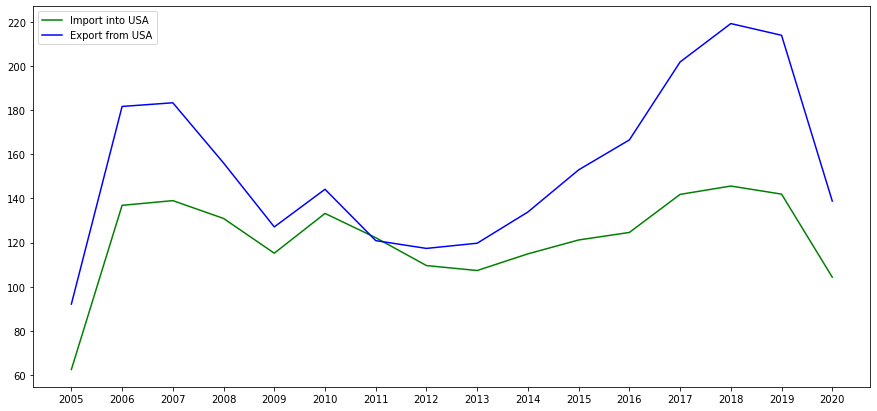

In [82]:
plt.figure(figsize = (15, 7))
plt.plot('Year', 'KiloTons', data = data1[data1['activity_type']=='Enplaned'], color = 'g', label ='Import into USA')
plt.plot('Year', 'KiloTons', data = data1[data1['activity_type']=='Deplaned'], color = 'b', label = 'Export from USA')
plt.legend(loc = 'best')

**Выводы**
<br> Экспорт из США превышает импорт в рассматриваемые 15 лет. В среднем объемы экспорта и импорта сохраняют соотношение между собой. Всплеск наблюдался в 2006-2007 гг и с 2016 по 2019 гг. Серьезное снижение объемов произошло во время кризиса 2008,затянувшегося и перетекшего в кризис 2013-2014 гг. Постепенное увеличение внешнеторговых операций наблюдалось с 2013 года, с серьезным улучшением стуации с 2016 года (количество экспортируемого груза в весовом выражении увеличилось в среднем на 40 килотонн в год в разрезе рейсов из аэропорта Сан-Франциско). Серьезный спад в части ВЭД произошел в 2020 г. в связи с пандемией. 
 